# Basic BootstrapODPSample

In [1]:
import chainladder as cl

This example demonstrates how you can can use the Overdispersed Poisson
Bootstrap sampler and get various properties about parameter uncertainty.


In [2]:
import chainladder as cl

#  Grab a Triangle
tri = cl.load_sample('genins')

# Generate bootstrap samples
sims = cl.BootstrapODPSample(random_state=42).fit_transform(tri)

# Calculate LDF for each simulation
sim_ldf = cl.Development().fit(sims).ldf_

plot1 = tri.T / 1e6
plot2 = (sims.sum() / 1000).T / 1e6
plot3a = sim_ldf.T
plot3b = cl.Development().fit(tri).ldf_.drop_duplicates().T
plot4 = sim_ldf.T.loc['12-24']

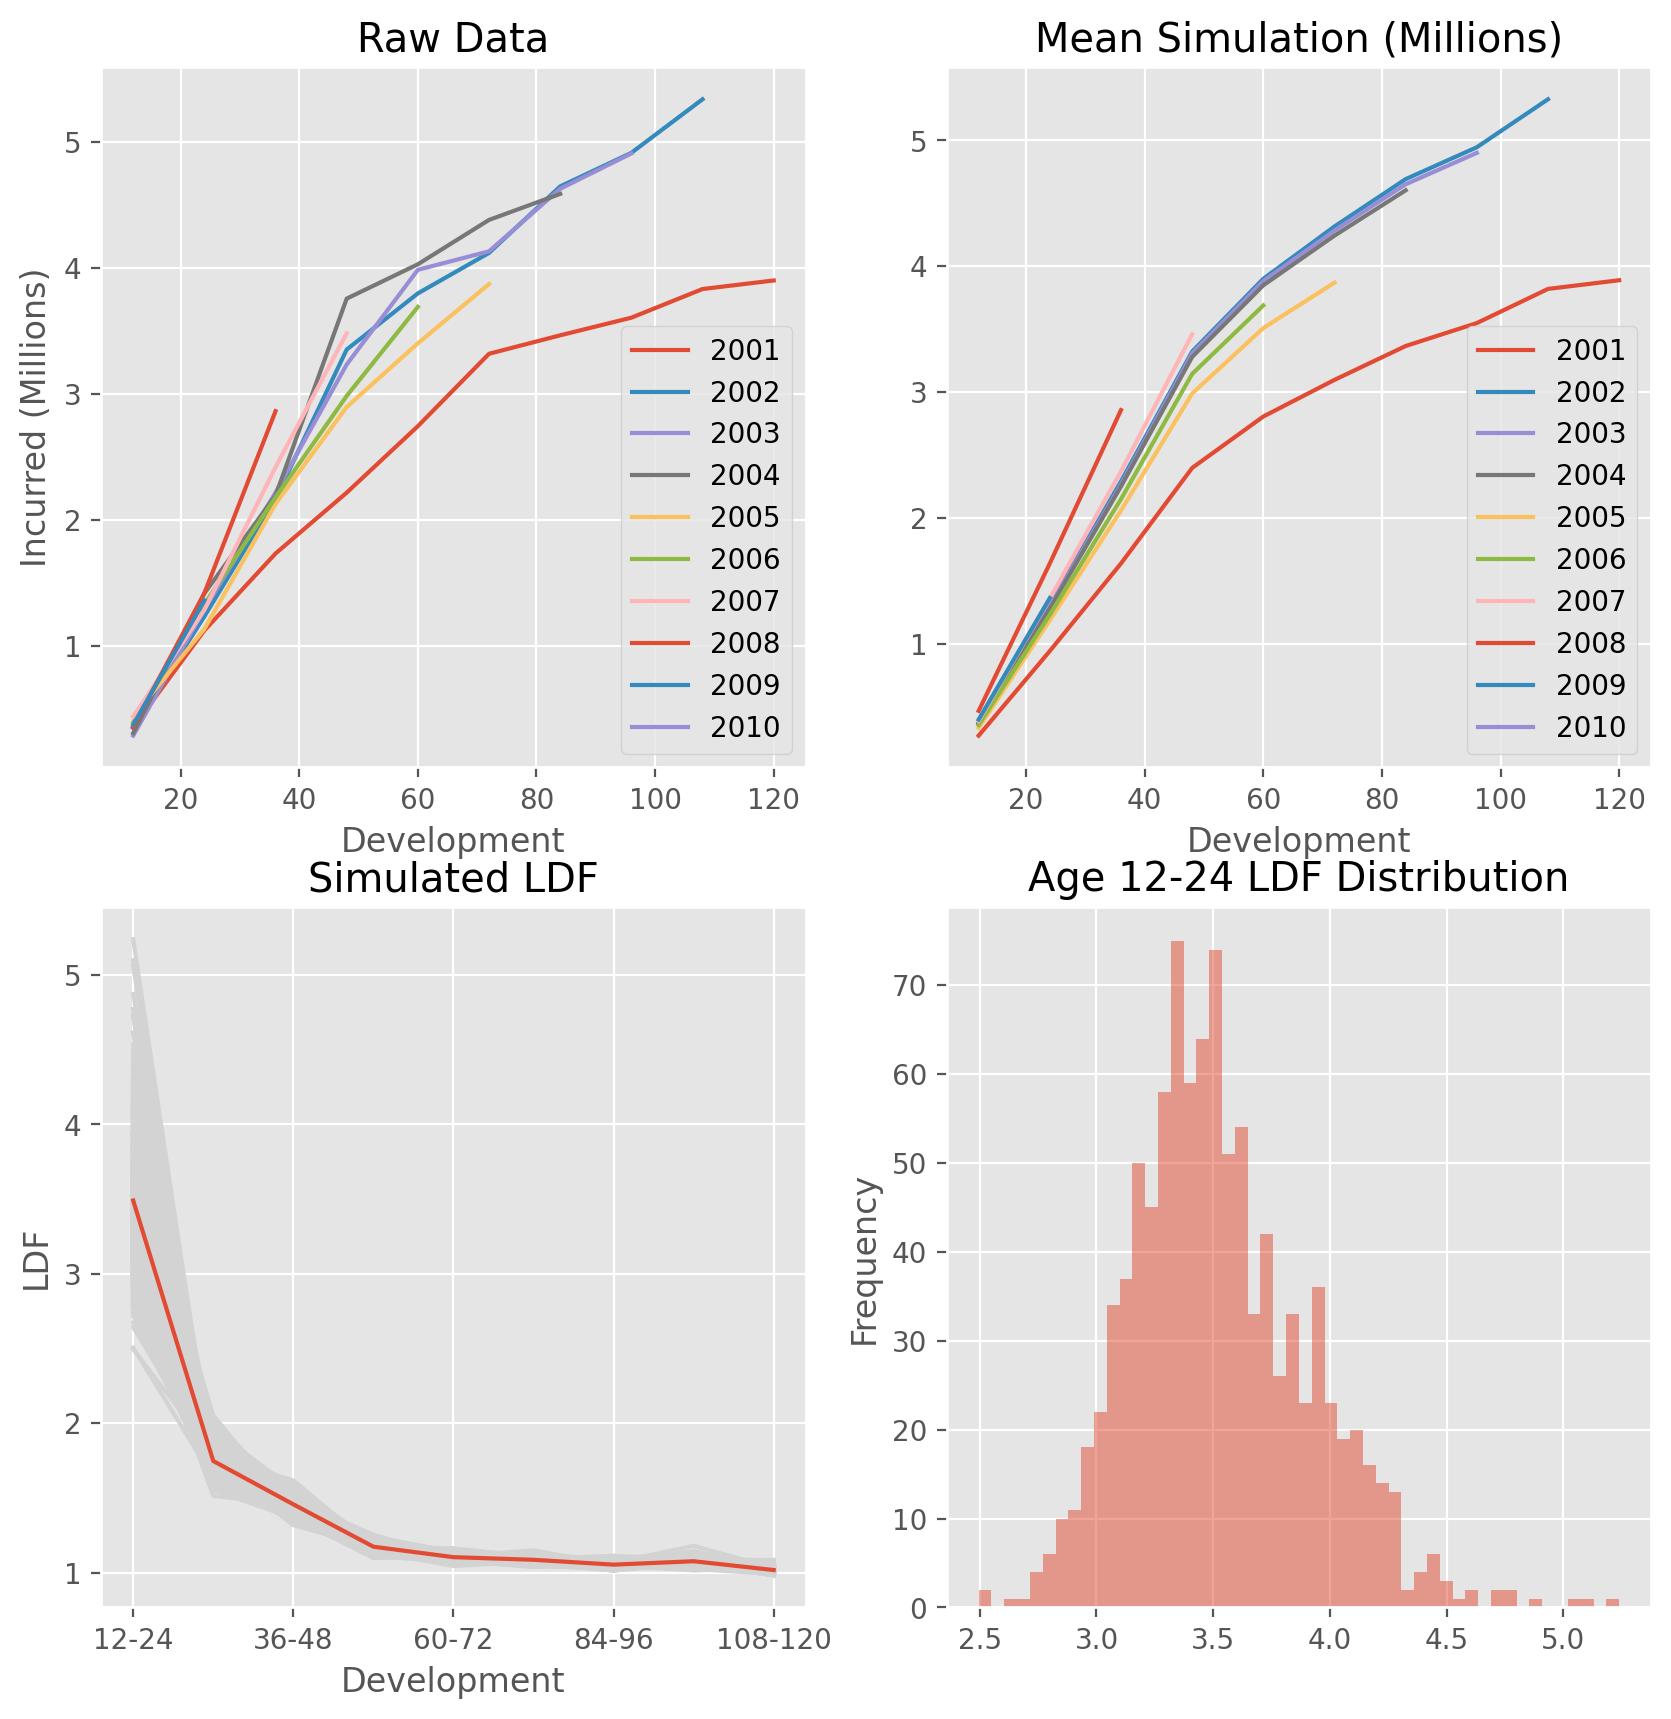

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Plot the Data
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(ncols=2, nrows=2, figsize=(10,10))

# Plot 1
plot1.plot(ax=ax00, title='Raw Data', xlabel='Development', ylabel='Incurred (Millions)')

# Plot 2
plot2.plot(ax=ax01, title='Mean Simulation (Millions)', xlabel='Development')

# Plot 3
plot3a.plot(legend=False, color='lightgray', ax=ax10, 
    title='Simulated LDF', xlabel='Development', ylabel='LDF')
plot3b.plot(legend=False, ax=ax10, grid=True)

# Plot 4
plot4.plot(
    kind='hist', bins=50, alpha=0.5, ax=ax11,
    title='Age 12-24 LDF Distribution', xlabel='LDF');